It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/First_Model.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/First_Model.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# First Neural Network

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


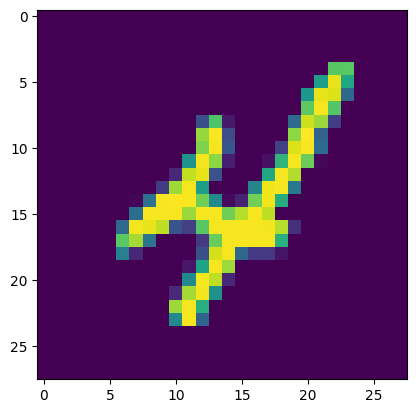

In [2]:
# Image example
plt.imshow(x_train[9])
plt.show()

In [4]:
# Definir la arquitectura del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana la imagen de entrada 28x28 en un array 1D de 784 valores
    tf.keras.layers.Dense(128, activation='relu'), # Capa densa con 128 neuronas y activación ReLU
    tf.keras.layers.Dropout(0.2), # Capa de dropout para regularización y prevenir sobreajuste
    tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por cada clase) y activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam', # Usar el optimizador Adam
              loss='sparse_categorical_crossentropy', # Función de pérdida sparse categorical crossentropy para clasificación multiclase
              metrics=['accuracy']) # Rastrear la métrica de exactitud durante el entrenamiento

# Entrenar el modelo con el dataset
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8508 - loss: 0.5016 - val_accuracy: 0.9633 - val_loss: 0.1238
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9530 - loss: 0.1564 - val_accuracy: 0.9753 - val_loss: 0.0884
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9653 - loss: 0.1140 - val_accuracy: 0.9777 - val_loss: 0.0784
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9720 - loss: 0.0917 - val_accuracy: 0.9775 - val_loss: 0.0746
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9763 - loss: 0.0754 - val_accuracy: 0.9787 - val_loss: 0.0697
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9795 - loss: 0.0662 - val_accuracy: 0.9827 - val_loss: 0.0668
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0572 - val_accuracy: 0.9808 - val_loss: 0.0737
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9830 - loss: 0.0517 - 

In [5]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Imprimir la pérdida y la exactitud en el conjunto de prueba
print(f"Pérdida en prueba: {test_loss}, Exactitud en prueba: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0834
Pérdida en prueba: 0.07367105036973953, Exactitud en prueba: 0.9786999821662903


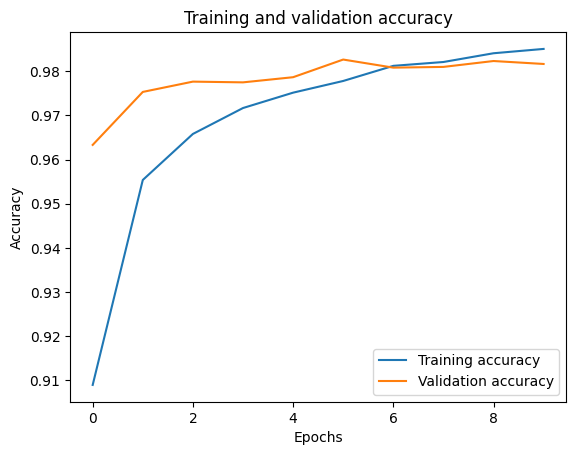

In [6]:
# Visualize the training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()